# Datacamp - Module 2

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('BostonHousing.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
#shape: number of instances, number of features
df.shape

(506, 14)

In [6]:
#describe: summary statistics
df.describe()

#we can make it about a specific column(s) in the dataframe
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [9]:
#.columns: An index of columns: the column names.
print(df.columns)
#.index: An index for the rows: either row numbers or row names.
df.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')


RangeIndex(start=0, stop=506, step=1)

In [26]:
#sorting can be made with more than one condition. You can specify whether the second condition is ascending or descending
#In the example below, you want to show houses with lower crime rate (CRIM), given the same median value (MEDV)
df[['MEDV','CRIM', 'TAX']].sort_values(['MEDV', 'CRIM'], ascending = [False, True]).head()

,MEDV,CRIM,TAX
195,50.0,0.01381,255
283,50.0,0.01501,198
204,50.0,0.02009,224
186,50.0,0.05602,193
225,50.0,0.52693,307


In [12]:
df[['MEDV','CRIM', 'TAX']].sort_values(['MEDV', 'CRIM'], ascending = [False, True])

,MEDV,CRIM,TAX
195,50.0,0.01381,255
283,50.0,0.01501,198
204,50.0,0.02009,224
186,50.0,0.05602,193
225,50.0,0.52693,307
...,...,...,...
414,7.0,45.74610,666
399,6.3,9.91655,666
400,5.6,25.04610,666
398,5.0,38.35180,666


In [13]:
#subsetting with multiple conditions (note: remember to add a parenthesis to each of the conditions)
#example:
df[(df['MEDV'] > 40) & (df['TAX'] < 200)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,4.45,50.0,1
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,3.16,50.0,1


In [14]:
#Convert data type from int to categorical use astype('type') #int, float, string, category
df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [15]:
df['CAT. MEDV'] = df['CAT. MEDV'].astype('category')
df['CAT. MEDV'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
df['CAT. MEDV'].value_counts()

0    422
1     84
Name: CAT. MEDV, dtype: int64

In [17]:
#subsetting for categorical values .isin() method
#example:
df[df['CAT. MEDV'].isin([1])].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,4.32,30.8,1
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,1.98,34.9,1


# Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square-brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "col_a" of the DataFrame df, use

In [18]:
subset = df[['CRIM', 'NOX','RM','MEDV']]
subset.head()

,CRIM,NOX,RM,MEDV
0,0.00632,0.538,6.575,24.0
1,0.02731,0.469,6.421,21.6
2,0.02729,0.469,7.185,34.7
3,0.03237,0.458,6.998,33.4
4,0.06905,0.458,7.147,36.2


# Creating a new column

In [19]:
df['medv_1000s'] = df['MEDV']*1000

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,medv_1000s
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,36200.0


# The .agg() method

The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super efficient. For example,

`df['column'].agg(function)`

In [21]:
import numpy as np
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [22]:
df['MEDV'].agg(iqr)

7.975000000000001

In [23]:
df[['MEDV','NOX']].agg([iqr,np.median])

,MEDV,NOX
iqr,7.975,0.175
median,21.200,0.538


# Drop duplicate names

`.drop_duplicates(subset = 'column_name')`

In [24]:
df = df.drop_duplicates(subset = ['CRIM', 'ZN'])

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,medv_1000s
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,36200.0


# Value counts

`.value_counts(sort = True)`

In [26]:
df['CAT. MEDV'].value_counts(sort = True)

0    421
1     84
Name: CAT. MEDV, dtype: int64

In [27]:
df['CAT. MEDV'].value_counts(normalize = True)

0    0.833663
1    0.166337
Name: CAT. MEDV, dtype: float64

# GroupBy

`.groupby('column_to_group_by')`

In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV', 'medv_1000s'],
      dtype='object')

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,medv_1000s
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,36200.0


In [30]:
#majority of houses have a lower median value
df[df['CAT. MEDV'] == 0]['MEDV'].agg(['sum', 'count'])

sum      8121.2
count     421.0
Name: MEDV, dtype: float64

In [31]:
#few houses account for a good portion of the value
df[df['CAT. MEDV'] == 1]['MEDV'].agg(['sum', 'count'])

sum      3259.0
count      84.0
Name: MEDV, dtype: float64

In [32]:
df.groupby("CAT. MEDV")["MEDV"].agg(['sum','count','mean','median'])

,sum,count,mean,median
CAT. MEDV,,,,
0,8121.2,421,19.290261,20.00
1,3259.0,84,38.797619,36.15


# Pivot table

`.pivot_table(values = 'column_to_summarize', index = 'column_to_group_by')`
Note: by default pivot_table takes the mean value for each group (index), we can change this by specifying the aggregation function
The `columns` argument of `.pivot_table()` takes in the name of the second column you want to group by.

In [114]:
df.pivot_table(values = ['MEDV', 'NOX', 'RM'], index = 'CAT. MEDV', aggfunc = np.median) 
#the result is the mean MEDV value of a home
#note how more expensive homes typically have less NOX and more Rooms
#you can add a second condition to group by using column argument, set fill_value = 0 to N/As

,MEDV,NOX,RM
CAT. MEDV,,,
0,20.00,0.5440,6.1130
1,36.15,0.4665,7.2045


Fill in missing values and sum values with pivot tables
The `.pivot_table()` method has several useful arguments, including `fill_value and `margins.

 - `fill_value` replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course but the simplest thing to do is to substitute a dummy value.
 - `margins` is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

# Chapter 3: Data Visualization

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Pandas provides a number of basic plotting capabilities. Matplotlib however gives you more control over details of the visualisation. The Pandas plot methods return an axes object, which can also be used to modify the visualisation using basic matplotlib commands.

## Import required packages

In [34]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

C:\install\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
pwd

'C:\\Users\\phillip\\data_mining\\week3'

# Exploratory Data Analysis

In Chapter 2, the book describes a set of plots that can be used to explore datasets. Visualization techniques are used in the preprocessing portion of the data mining process. It is sometimes reffered to as Exploratory Data Analysis (EDA).

Data visualization can help you identify patterns in the data and also help in assessing the quality of the data (e.g., missing values, distribution of the variables, etc.).

There are many Python libraries for data visualization but a popular one is: *matplotlib*.

 - Basic plots (bar charts, line graphs, and scatterplots)
 - Distribution plots (boxplots and histograms)
 - Other plots (heatmaps, time-series)

## Table 3.2 - 

In [35]:
housing_df = pd.read_csv('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Basic plots

#### Bar charts

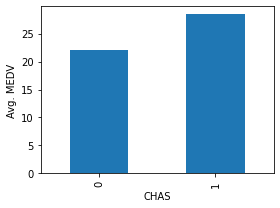

In [36]:
ax = housing_df.groupby('CHAS').MEDV.mean().plot(kind='bar', figsize=[4, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

C:\install\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """


Text(0, 0.5, 'Avg. MEDV')

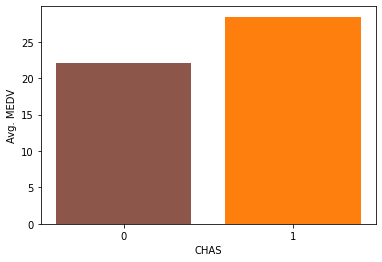

In [50]:
# compute mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

## Another example

In [195]:
# Cars dataset

In [37]:
cars = pd.read_csv('ToyotaCorolla.csv')

In [38]:
cars.shape

(1436, 39)

In [39]:
cars.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [40]:
cars[cars['KM']>200000].shape

(10, 39)

In [131]:
cars[['Model','KM']].max()

Model    TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV
KM                                         243000
dtype: object

In [43]:
cars['Mfg_Year'] = cars['Mfg_Year'].astype('category')

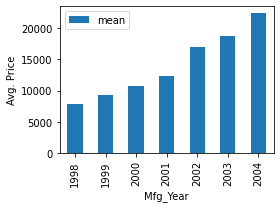

In [45]:
#cars['Mfg_Year']
ax = cars.groupby('Mfg_Year').Price.agg(['mean']).plot(kind='bar', figsize=[4, 3]) #fill in the blanks
ax.set_ylabel('Avg. Price')

plt.tight_layout()
plt.show()

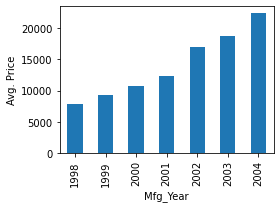

In [48]:
#cars['Mfg_Year']
ax = cars.groupby('Mfg_Year').Price.().plot(kind='bar', figsize=[4, 3]) #fill in the blanks
ax.set_ylabel('Avg. Price')

plt.tight_layout()
plt.show()

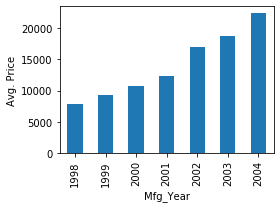

In [194]:
#cars['Mfg_Year']
ax = cars.groupby('_______').Price.______().plot(kind='bar', figsize=[4, 3]) #fill in the blanks
ax.set_ylabel('Avg. Price')

plt.tight_layout()
plt.show()

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'))

Source: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots

## Scatter plot

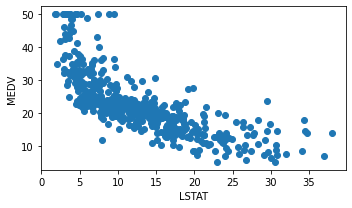

In [46]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

## Histogram - Boston housing

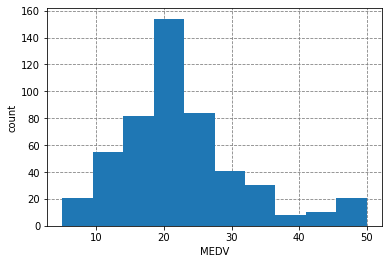

In [47]:
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

## Box plots

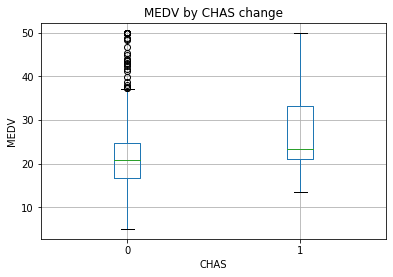

In [234]:
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('MEDV by CHAS change')
plt.show()

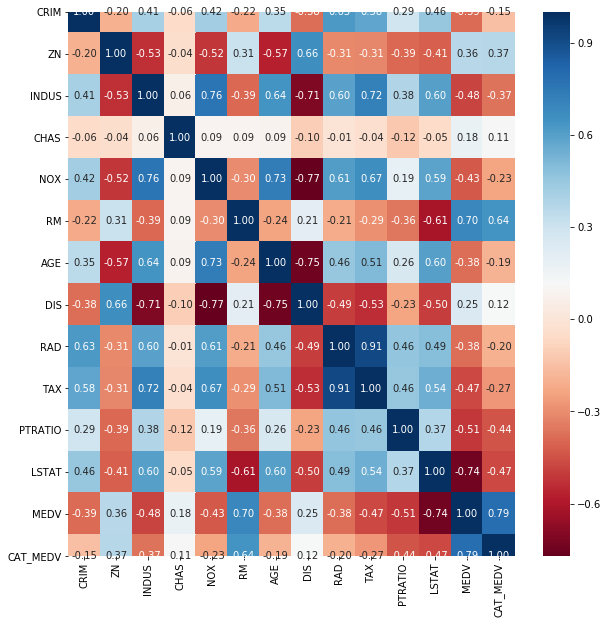

In [222]:
corr = housing_df.corr()
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", ax=ax)
plt.show()

## Time series - Amtrak Riding

In [52]:
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = Amtrak_df['Ridership']
print(ridership_ts.head())
ridership_ts.index = Amtrak_df['Date']
print(ridership_ts.head())

0    1708.917
1    1620.586
2    1972.715
3    1811.665
4    1974.964
Name: Ridership, dtype: float64
Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Name: Ridership, dtype: float64


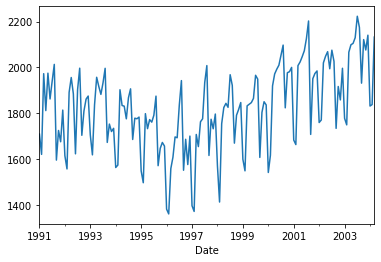

In [183]:
ridership_ts.plot()

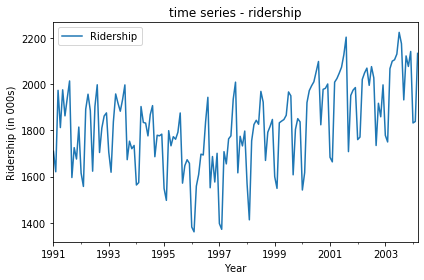

In [184]:
ridership_ts.plot(legend = True)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.title('time series - ridership')
plt.tight_layout()
plt.show()